In [1]:
pip install efficientnet_pytorch

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 47.7 MB/s eta 0:00:00
  Created wheel for efficientnet_pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16424 sha256=2311141e3a44f2d2b8b185338ccb5ad97a7e4822d4ce9f6064

In [2]:
#importing required modules
import gdown
import zipfile
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torchsummary import summary
from torchvision import datasets, transforms as T
from efficientnet_pytorch import EfficientNet
import os
import random
import time
import copy
import torch.optim as optim
from PIL import ImageFile
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

In [3]:
SEED = 42

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [4]:
#importing data
#Dataset address
url ='https://drive.google.com/uc?export=download&id=1pxyzuKnxrI-bSFdfuOItQGTcK_JcwqbN'

# https://drive.google.com/file/d/1pxyzuKnxrI-bSFdfuOItQGTcK_JcwqbN/view?usp=share_link
output = 'covid19.zip'
gdown.download(url, quiet = False)

# giving zip file
data_dir = './covid19.zip'
# extracting file
with zipfile.ZipFile(data_dir, 'r') as zf:
  zf.extractall('./data/')

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1pxyzuKnxrI-bSFdfuOItQGTcK_JcwqbN
From (redirected): https://drive.google.com/uc?export=download&id=1pxyzuKnxrI-bSFdfuOItQGTcK_JcwqbN&confirm=t&uuid=59bdf253-2838-4338-9f1d-1298378fe9ec
To: /content/covid19.zip
100%|██████████| 1.25G/1.25G [00:21<00:00, 58.0MB/s]


In [5]:
use_cuda = torch.cuda.is_available()

In [6]:

batch_size = 32

img_transforms={
    'train': T.Compose([T.Resize(size=(224, 224)),
                        T.ToTensor(),
                        T.Normalize([0.5, 0.5,0.5],[0.5, 0.5, 0.5]),
                        ]),
    'validation': T.Compose([T.Resize(size=(224, 224)),
                        T.ToTensor(),
                        T.Normalize([0.5, 0.5,0.5],[0.5, 0.5, 0.5]),
                        ]),
    'test': T.Compose([T.Resize(size=(224, 224)),
                        T.ToTensor(),
                        T.Normalize([0.5, 0.5,0.5],[0.5, 0.5, 0.5]),
                        ]),
}

data = '/content/data/data_covid19'

train_path = os.path.join(data,'train')
valid_path = os.path.join(data,'validation')
test_path = os.path.join(data,'test')

train_file = datasets.ImageFolder(train_path,transform= img_transforms['train'])
valid_file = datasets.ImageFolder(valid_path,transform= img_transforms['validation'])
test_file = datasets.ImageFolder(test_path,transform= img_transforms['test'])

loaders_transfer={
    'train': torch.utils.data.DataLoader(train_file,batch_size,shuffle= True),
    'validation': torch.utils.data.DataLoader(valid_file,batch_size,shuffle= True),
    'test': torch.utils.data.DataLoader(test_file,batch_size,shuffle= True)

}

dataset_size = {'train': len(train_file), 'validation': len(valid_file), 'test': len(test_file)}

##############################################################

labels_name = train_file.classes





In [ ]:
labels_name

['covid', 'normal']

torch.Size([3, 224, 224])
(224, 224, 3)


Text(0.5, 1.0, 'normal')

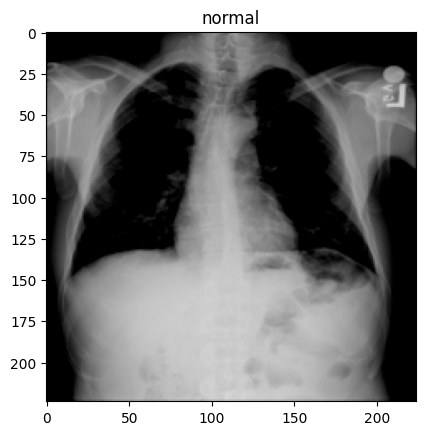

In [ ]:
# show tensor as an image
# use iter() & next() like a for loop

images, labels = next(iter(loaders_transfer['train']))
image = images[0]
print(image.shape)


######
label=labels[0].numpy()

image = image.permute(1, 2, 0)
image1=image.numpy()
print(image1.shape)

plt.imshow(image.numpy())
plt.title(str(labels_name[label]))


In [7]:
print(len(loaders_transfer['train']))

print(len(train_file))

75
2400


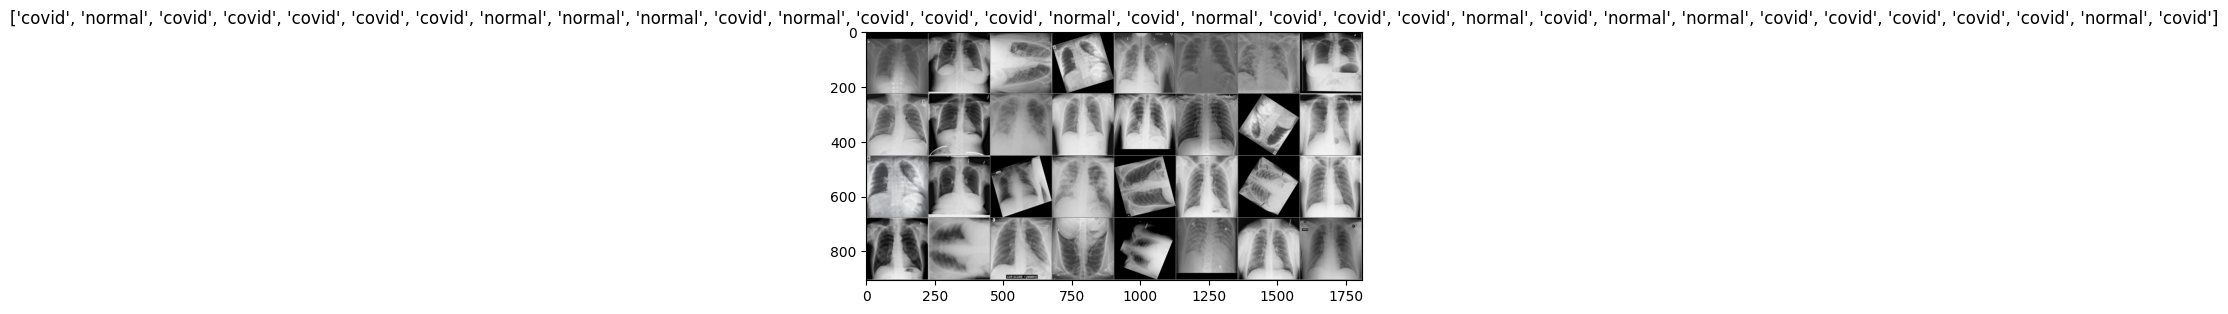

In [ ]:
import torchvision

def imshow(inp, title=None):
  inp = inp.numpy().transpose((1, 2, 0))   ### permute
  mean = np.array([0.5, 0.5, 0.5])
  std = np.array([0.5, 0.5, 0.5])
  inp = std * inp + mean
  inp = np.clip(inp, 0, 1)
  plt.imshow(inp)
  if title is not None:
    plt.title(title)
  plt.pause(0.001)


################################################################


images, labels = next(iter(loaders_transfer['train']))     #### one batch has 32 images

out = torchvision.utils.make_grid(images)

imshow(out,title=[labels_name[x] for x in labels])

model

In [8]:
model_transfer = EfficientNet.from_pretrained('efficientnet-b0')

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b0-355c32eb.pth
100%|██████████| 20.4M/20.4M [00:00<00:00, 233MB/s]

Loaded pretrained weights for efficientnet-b0


In [9]:
model_transfer._fc.in_features

1280

In [10]:

# freez weights

for param in model_transfer.parameters():
  param.requires_grad= False

# the number if in_feature
in_features = model_transfer._fc.in_features     ## the number of input layers for our classifier(fc)

# replace FC layer or classifier
model_transfer._fc = nn.Sequential(
    nn.BatchNorm1d(num_features= in_features),
    nn.Linear(in_features, 512),
    nn.ReLU(),
    nn.BatchNorm1d(512),
    nn.Linear(512,128),
    nn.ReLU(),
    nn.BatchNorm1d(128),
    nn.Dropout(0.4),
    nn.Linear(128,2)
)

if use_cuda:
  model_transfer= model_transfer.cuda()


In [11]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.Adam(model_transfer.parameters(), lr = 0.0005)

In [12]:
def train_model(model, criterion, optimizer, num_epochs= 50):

    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'validation']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for image, label in loaders_transfer[phase]:
                image , label = image.cuda(), label.cuda()


                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(image)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, label)


                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * image.size(0)
                running_corrects += torch.sum(preds == label.data)
            #if phase == 'training':
                #scheduler.step()

            epoch_loss = running_loss / dataset_size[phase]
            epoch_acc = running_corrects.double() / dataset_size[phase]

            print(f' {phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # deep copy the model
            if phase == 'validation' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best validation Acc: {best_acc:4f}')

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [13]:
model_ft = train_model(model_transfer, criterion_transfer, optimizer_transfer, num_epochs=50)

Epoch 0/49
----------
 train Loss: 0.1749 Acc: 0.9208
 validation Loss: 0.5141 Acc: 0.7520

Epoch 1/49
----------
 train Loss: 0.0834 Acc: 0.9667
 validation Loss: 0.6649 Acc: 0.7280

Epoch 2/49
----------
 train Loss: 0.0679 Acc: 0.9754
 validation Loss: 0.9657 Acc: 0.6720

Epoch 3/49
----------
 train Loss: 0.0630 Acc: 0.9771
 validation Loss: 0.6664 Acc: 0.7880

Epoch 4/49
----------
 train Loss: 0.0527 Acc: 0.9808
 validation Loss: 0.3540 Acc: 0.8720

Epoch 5/49
----------
 train Loss: 0.0429 Acc: 0.9829
 validation Loss: 0.3343 Acc: 0.8660

Epoch 6/49
----------
 train Loss: 0.0397 Acc: 0.9838
 validation Loss: 0.2907 Acc: 0.8940

Epoch 7/49
----------
 train Loss: 0.0402 Acc: 0.9854
 validation Loss: 0.2336 Acc: 0.9040

Epoch 8/49
----------
 train Loss: 0.0461 Acc: 0.9838
 validation Loss: 0.1833 Acc: 0.9320

Epoch 9/49
----------
 train Loss: 0.0579 Acc: 0.9800
 validation Loss: 0.1847 Acc: 0.9240

Epoch 10/49
----------
 train Loss: 0.0296 Acc: 0.9908
 validation Loss: 0.1746 

In [23]:
def test(loaders, model, criterion, use_cuda):
  # monitoring test loss and accuracy
  test_loss = 0.
  correct = 0.
  total = 0.
  preds = []
  targets = []

  model.eval()

  for batch_idx, (data, target) in enumerate(loaders['test']):
    if use_cuda:
      data, target = data.cuda(), target.cuda()
      # forward pass
      output = model(data)
      # calculate the loss
      loss = criterion(output, target)

      _,pred = torch.max(output, 1)

      test_loss += loss.item() * data.size(0)
      correct += torch.sum(pred == target.data)

      epoch_loss_test = test_loss / dataset_size['test']
      epoch_acc_test = correct.double() / dataset_size['test']
      preds.append(pred)
      targets.append(target)


  return preds, targets


In [ ]:
preds, targets = test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

In [24]:
preds2, targets2 = [],[]
for i in preds:
  for j in range(len(i)):
    preds2.append(i.cpu().numpy()[j])
for i in targets:
  for j in range(len(i)):
    targets2.append(i.cpu().numpy()[j])

In [27]:
acc = accuracy_score(targets2, preds2)
print("Accuracy: ", acc)

Accuracy:  0.96


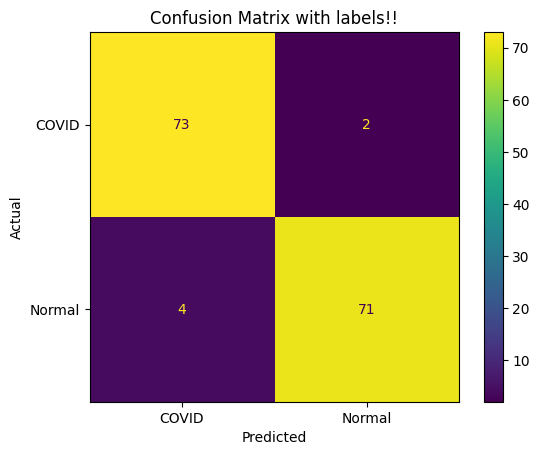

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(targets2, preds2)

cmob = ConfusionMatrixDisplay(cm, display_labels=['COVID', 'Normal'])

cmob.plot()

cmob.ax_.set(title='Confusion Matrix',
            xlabel='Predicted',
            ylabel='Actual')

plt.show()

In [33]:
print('The classification report is:\n{:}'.format(classification_report(preds2,targets2)))

The classification report is:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        77
           1       0.95      0.97      0.96        73

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150

